In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [15]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['salary']=le.fit_transform(df['salary'])
df['sales']=le.fit_transform(df['sales'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
x = df.drop(['left'], axis=1)
y = df['left']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print('Accuracy: %.2f'% accuracy_score(y_test, y_pred))

Accuracy: 0.78


In [11]:
cm = confusion_matrix(y_test, y_pred)

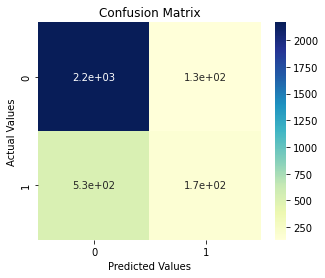

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [13]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.566
Recall: 0.245
F1 Score: 0.342


# Comparison

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(max_iter=1000), 
               SVC(kernel = 'linear', probability=True),
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier()]

In [ ]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)
    yproba = yproba[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()